# Primeira Parte

#### Pegando os valores em binario do arquivo de teste e treino

In [57]:
import numpy as np
import matplotlib.pyplot as plt

image_size = 28 #tamanho l x l 
no_of_different_labels = 10 # 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size # 28*28
data_path = "data/mnist/" # caminho para os arquivos
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 
print(test_data[:10])
#print(train_data[:10])

test_data.shape


KeyboardInterrupt



In [59]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01 # asfarray([2, 3]) => [2.,3.]
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

train_labels = np.asfarray(train_data[:, :1]) # Aplicando para os rotulos
test_labels = np.asfarray(test_data[:, :1])
#print(train_imgs[:10])
#print(test_imgs[:10])
#print(train_labels[:10])
print(test_labels[:10])

[[7.]
 [2.]
 [1.]
 [0.]
 [4.]
 [1.]
 [4.]
 [9.]
 [5.]
 [9.]]


## Mostrando o comportamento da coversão do rotulo

In [47]:
lr = np.arange(10)

for rotulo in range(10):
    valor = (lr==rotulo).astype(np.int32) # Mudando de Bool para int
    print("valor: ", rotulo, " representação: ", valor)


valor:  0  representação:  [1 0 0 0 0 0 0 0 0 0]
valor:  1  representação:  [0 1 0 0 0 0 0 0 0 0]
valor:  2  representação:  [0 0 1 0 0 0 0 0 0 0]
valor:  3  representação:  [0 0 0 1 0 0 0 0 0 0]
valor:  4  representação:  [0 0 0 0 1 0 0 0 0 0]
valor:  5  representação:  [0 0 0 0 0 1 0 0 0 0]
valor:  6  representação:  [0 0 0 0 0 0 1 0 0 0]
valor:  7  representação:  [0 0 0 0 0 0 0 1 0 0]
valor:  8  representação:  [0 0 0 0 0 0 0 0 1 0]
valor:  9  representação:  [0 0 0 0 0 0 0 0 0 1]


In [61]:
lr = np.arange(no_of_different_labels)

# Modificar os rotulos em representação em 0 e 1
train_labels_one_hot = (lr==train_labels).astype(float)
test_labels_one_hot = (lr==test_labels).astype(float)
#print(train_labels_one_hot[:10])
#print(test_labels_one_hot[:10])
# Retirar os 0 e 1 das representações
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99
#print(train_labels_one_hot[:10])
#print(test_labels_one_hot[:10])

## Representaçao da imagem de 28x28 do MNIST

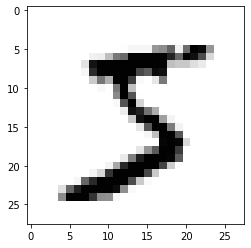

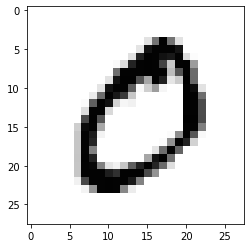

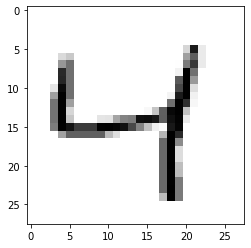

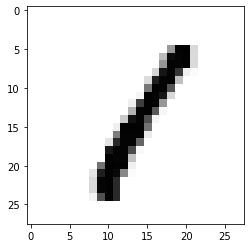

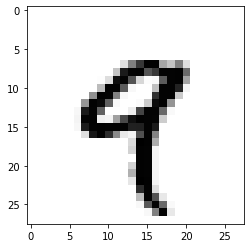

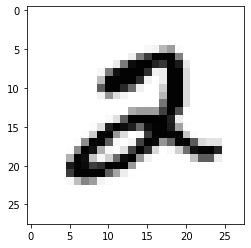

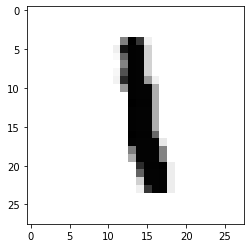

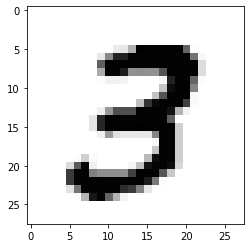

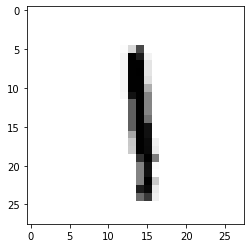

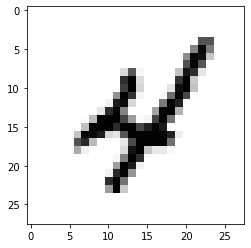

In [7]:
for i in range(10):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [14]:
import pickle

with open("data/mnist/pickled_mnist.pkl", "bw") as fh:
    data = (train_imgs, 
            test_imgs, 
            train_labels,
            test_labels)
    pickle.dump(data, fh)

In [67]:
import pickle

with open("data/mnist/pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)

train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]

train_labels_one_hot = (lr==train_labels).astype(float)
test_labels_one_hot = (lr==test_labels).astype(float)


image_size = 28 # Tamanho l x l 
no_of_different_labels = 10 # 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

In [68]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,
                     (upp - mean) / sd,
                     loc=mean,
                     scale=sd)


class NeuralNetwork:
 
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate,
                 bias=None
                ):  

        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        
        self.no_of_hidden_nodes = no_of_hidden_nodes
            
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()
    
        
    
    def create_weight_matrices(self):
        """ 
        A method to initialize the weight matrices 
        of the neural network with optional 
        bias nodes"""
        
        bias_node = 1 if self.bias else 0
        
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, 
                          self.no_of_in_nodes + bias_node))

        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, 
                          self.no_of_hidden_nodes + bias_node))
        
 
    def train_single(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuple, 
        list or ndarray
        """

        bias_node = 1 if self.bias else 0
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, 
                                            [self.bias]) )
        
        output_vectors = []
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T

        
        output_vector1 = np.dot(self.wih, 
                                input_vector)
        output_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_hidden = np.concatenate((output_hidden, 
                                            [[self.bias]]) )

        
        output_vector2 = np.dot(self.who, 
                                output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network * (1.0 - output_network)          
        tmp = self.learning_rate  * np.dot(tmp, 
                                           output_hidden.T) 
        self.who += tmp

        
        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, 
                               output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:] 
        else:
            x = np.dot(tmp, input_vector.T)
        self.wih += self.learning_rate * x
        

    def train(self, data_array, 
              labels_one_hot_array,
              epochs=1,
              intermediate_results=False):
        intermediate_weights = []
        for epoch in range(epochs):  
            for i in range(len(data_array)):
                self.train_single(data_array[i], 
                                  labels_one_hot_array[i])
            if intermediate_results:
                intermediate_weights.append((self.wih.copy(), 
                                             self.who.copy()))
        return intermediate_weights      
        

        
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, 
                                            [self.bias]) )
        input_vector = np.array(input_vector, ndmin=2).T

        output_vector = np.dot(self.wih, 
                               input_vector)
        output_vector = activation_function(output_vector)
        
        if self.bias:
            output_vector = np.concatenate( (output_vector, 
                                             [[self.bias]]) )
            

        output_vector = np.dot(self.who, 
                               output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
    
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [70]:
epochs = 2

network = NeuralNetwork(no_of_in_nodes=image_pixels, 
                        no_of_out_nodes=10, 
                        no_of_hidden_nodes=100,
                        learning_rate=0.1,
                        bias=None)

weights = network.train(train_imgs, 
                        train_labels_one_hot, 
                        epochs=epochs, 
                        intermediate_results=True) 

ANN = NeuralNetwork(no_of_in_nodes=image_pixels, 
                    no_of_out_nodes=10, 
                    no_of_hidden_nodes=200,
                    learning_rate=0.1,
                    bias=None)
for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])
for i in range(20):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))

ValueError: shapes (200,784) and (1,1) not aligned: 784 (dim 1) != 1 (dim 0)